In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import math

random.seed(123) # Works same every time we run

In [2]:
def mean_square_error_function(y_true, y_pred):
    return ((y_true - y_pred)**2).sum() / len(y_true)

In [3]:
my_x = np.arange(0,10,0.1)

randomness = [random.randint(-10,10) for x in range(100)]
m = 5
b = 5
y_actual = m*my_x+b
y_regression = m*my_x+b+randomness

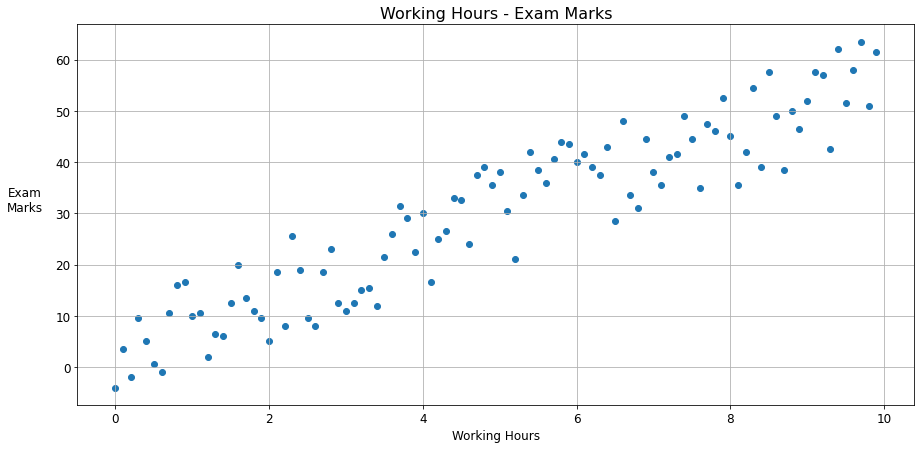

In [4]:
figure = plt.figure(1,(15,7))
plt.title("Working Hours - Exam Marks",fontsize=16)
plt.scatter(my_x, y_regression)
plt.xlabel("Working Hours",fontsize=12)
plt.yticks(np.arange(0,70,10), fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Exam\nMarks",rotation=0,fontsize=12,labelpad=30)
plt.grid(True)
plt.show()

In [5]:
def gradient_descent(m,b,independent,dependent,learning_rate):
    gradient_for_m = 0
    gradient_for_b = 0
    
    number_of_points = len(independent)
    
    for i in range(0,number_of_points):
        
        gradient_for_m += -2/number_of_points * independent[i] * (dependent[i] - (m*independent[i]+b))
        gradient_for_b += -2/number_of_points * (dependent[i] - (m*independent[i]+b))
    m = m - learning_rate*gradient_for_m
    b = b - learning_rate*gradient_for_b
    
    
    return m,b
        

In [6]:
number_of_epoch=1000
learning_rate = 0.003
m,b=0,0
errors = []
for e in range(0,number_of_epoch):
    m,b=gradient_descent(m,b,my_x,y_regression,learning_rate)
    errors.append(mean_square_error_function(y_regression,m*my_x+b))


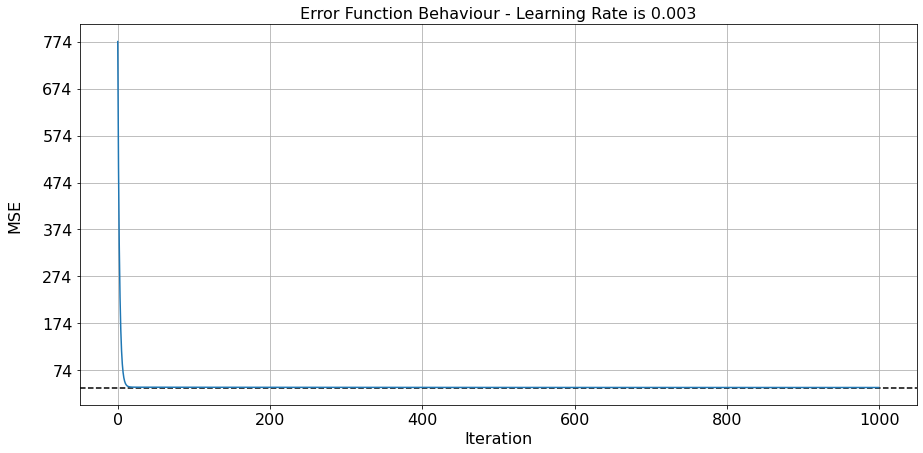

In [7]:
# Plot the error function
figure = plt.figure(1,(15,7))
plt.title(f"Error Function Behaviour - Learning Rate is {learning_rate}",fontsize=16)
plt.ylabel("MSE", labelpad=20,fontsize=16)
plt.axhline(errors[-1],color="black",linestyle='--')
y_ticks = np.arange(errors[0],errors[-1], -100)
plt.yticks(y_ticks,fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Iteration",fontsize=16)
plt.grid(True)
plt.plot(np.arange(0,len(errors),1), errors)
plt.savefig(f"Optimized_for_Descent{learning_rate}.png", format='png', dpi=300)
plt.show()

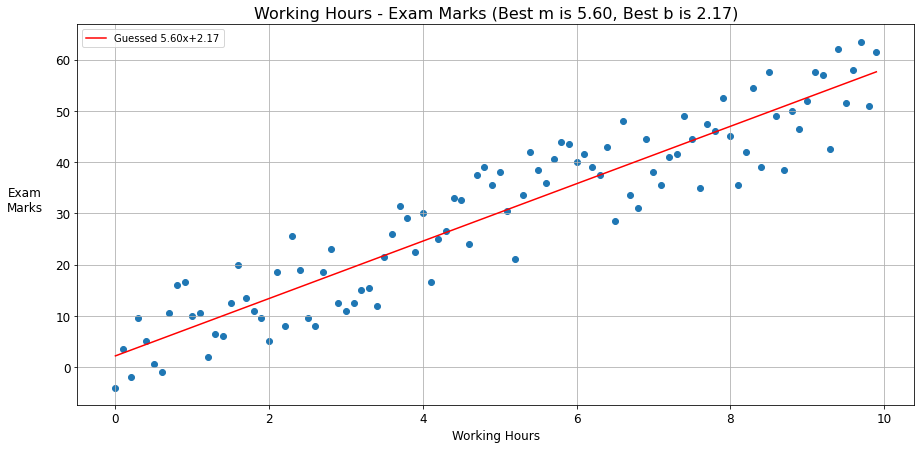

In [8]:
# Plot the final line
figure = plt.figure(1,(15,7))
plt.title(f"Working Hours - Exam Marks (Best m is {m:.2f}, Best b is {b:.2f})",fontsize=16)
plt.scatter(my_x, y_regression)
result = m*my_x+b
original = 5*my_x+5+randomness
plt.plot([my_x[0],my_x[-1]],[result[0],result[-1]],color="red",label=f"Guessed {m:.2f}x+{b:.2f}")
# plt.plot([my_x[0],my_x[-1]],[original[0],original[-1]],color="green", label="Original 5x+5")
plt.xlabel("Working Hours",fontsize=12)
plt.yticks(np.arange(0,70,10), fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Exam\nMarks",rotation=0,fontsize=12,labelpad=30)
plt.grid(True)
plt.legend()
plt.savefig(f"Optimized_for_Gradient_Best_m_Best_b_Learning_rate{learning_rate}.png", format='png', dpi=300)
plt.show()